<a href="https://colab.research.google.com/github/PuroshotamSingh/Book-Recommendation-System/blob/main/Book_Recommendation_System_Puroshotam_Kumar_Singh_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
<br>
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).<br>
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. **The main objective is to create a book recommendation system for users.**

# **Dataset information**

The Book-Crossing dataset comprises 3 files.<br>
● **Users** :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● **Books** : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● **Ratings** :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

# **Importing libraries**

In [1]:
# Importing libraries

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# To supress the warning messages

import warnings
warnings.filterwarnings('ignore')


# **Dataset initialization**

### **Loading Users data.**

In [2]:
# Loading Users data and creating dataframe

users = pd.read_csv('/content/drive/MyDrive/Copy of Users.csv')

In [3]:
# Printing first 10 rows of users dataframe

users.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [4]:
# Shape of dataset

users.shape

(278858, 3)

* **Number of instances: 278858**
* **Number of attributes: 3**

In [5]:
# Columns of users data

users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

* **In our users dataset, there are three features; User_ID, Location and Age.**

### **Loading Books data.**

In [6]:
# Loading Books data

books = pd.read_csv('/content/drive/MyDrive/Copy of Books.csv')

In [7]:
# Let's see first 3 rows of books dataset

books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [8]:
# Shape of dataset

books.shape

(271360, 8)

* **Number of instances: 271360**
* **Number of attributes: 8**

In [9]:
# Columns of books data

books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

* **In our books dataset, there are 8 features; 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'.**

### **Loading Ratings data.**

In [10]:
# Ratings data

ratings = pd.read_csv('/content/drive/MyDrive/Copy of Ratings.csv')

In [11]:
# Let's see first 5 rows of ratings dataset

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [12]:
# Shape of dataset

ratings.shape

(1149780, 3)

* **Number of instances: 1149780**
* **Number of attributes: 3**

In [13]:
# Columns of ratings data

ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

* **In our ratings dataset, there are three features; User_ID, ISBN and Book_Rating.**

# **EDA on Users dataset**

### **Let's check for null values.**

In [14]:
# Checking for total null values in each column

users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
# Percentage of null values in each column

print(100*(users.isnull().sum()/len(users.index)).sort_values(ascending=False))

Age         39.719857
Location     0.000000
User-ID      0.000000
dtype: float64


* **Age column have around 40% null values.**

**Let's check the distribution of Age column.**

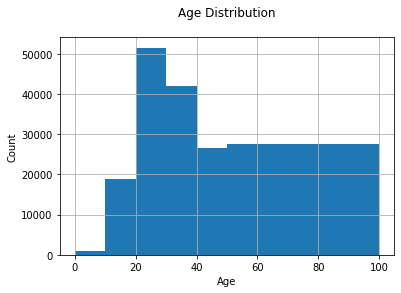

In [16]:
# Histplot showing distribution of age

users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**The most active users fall in the range of 20-30s.**

### **Let's check for outliers in Age column.**

Text(0.5, 1.0, 'Boxplot of Age column')

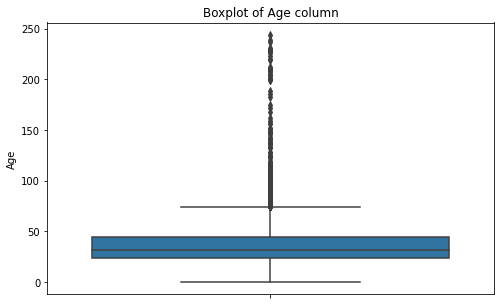

In [17]:
# Plotting boxplot for age column

plt.figure(figsize=(8,5))
sns.boxplot(y='Age', data=users)
plt.title('Boxplot of Age column')

In [18]:
# Descriptive stats of Age column

users.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

* **From boxplot as well as descriptive stats, it is clear that maximum value of age is 244.**
* **So, there are outliers in Age column.**

### **Let's clean Age column**

Text(0.5, 1.0, 'Age Distribution Plot')

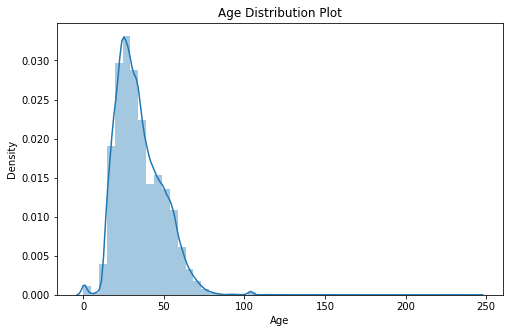

In [19]:
# Displot of Age column

plt.figure(figsize=(8,5))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

* **Age below 5 and above 100 do not make much sense for our book rating case.**
* **So, we can replace these by NaNs.**

In [20]:
# Replacing outlier data with NaN

users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

**Now let's again check for null values**

In [21]:
# Total no. of null values in users data

users.isna().sum()

User-ID          0
Location         0
Age         112010
dtype: int64

**Replacing NaN values with mean**

In [22]:
# Replacing Nan values with mean

users.Age = users.Age.fillna(users.Age.mean())

In [23]:
# Let's see total no of null values again

users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

**Great! We have impute all null values.**

**After cleaning let's see the distribution of Age column again**

Text(0.5, 1.0, 'Age Distribution Plot')

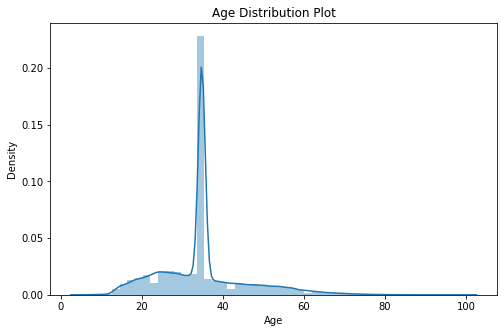

In [24]:
# Distplot to see distribution of Age after cleaning

plt.figure(figsize=(8,5))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

**Nice! We have treated outliers and also imputed null values.**

### **Location column**

* **Let's see unique values in location column.**

In [25]:
# Printing unique values of location column

users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

* **Location column contains some special characters.**
* **Let's clean this column and also create a new column 'Country'.**

In [26]:
# Creating column Country

for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

**Drop location column from dataset.**

In [27]:
# dropping location column

users.drop('Location',axis=1,inplace=True)

In [28]:
# Converting location column into string datatype

users['Country']=users['Country'].astype('str')

In [29]:
# Extracting elements of Country column

a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

* **Here, we can see that some data has misspellings. So, let's correct them.**

In [30]:
# Replacing incorrect words with correct one

users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

Text(0.5, 1.0, 'Count of users Country wise')

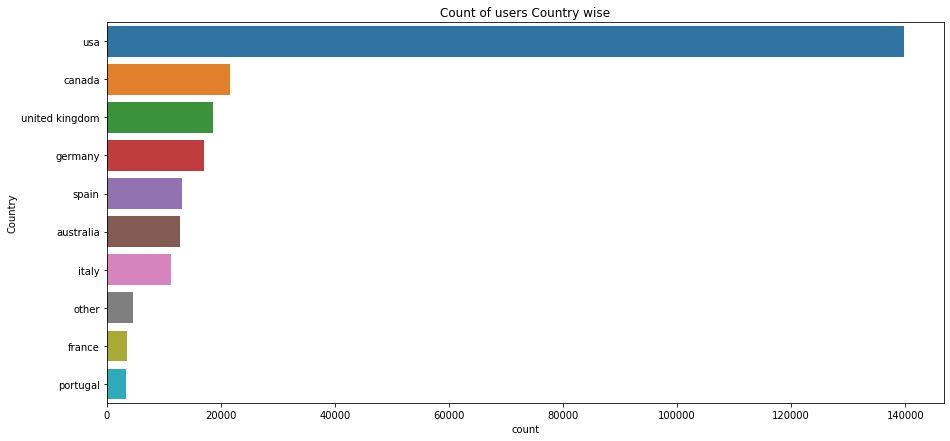

In [31]:
# Barplot to show count of users as per country

plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

* **Most number of users are from USA followed by Canada and United Kingdom.**

In [32]:
# Checking no. of null values in Users dataset.

users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

**Great! We have done EDA as well as cleaning of Users dataset.**

# **EDA on Books dataset**

**Let's have a look at books dataset again.**

In [33]:
# Printing top 3 rows of books dataset.

books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


* **Last three columns contain image URLs which will not be required for analysis.**

* **So, let's drop these columns.**

In [34]:
# Dropping last three columns

books.drop(list(books.columns)[-3:], axis=1, inplace=True)

In [35]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### **Let's find top 10 authors who have written the maximum number of books.**

Text(0.5, 1.0, 'Top 10 Authors')

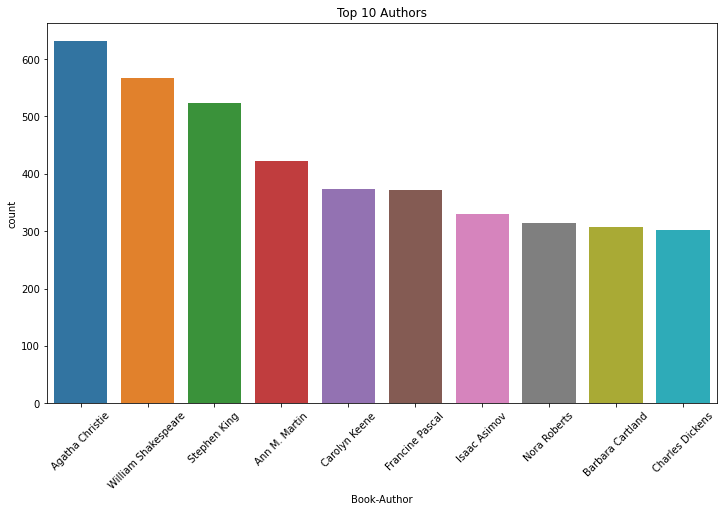

In [36]:
# Barplot to show top 10 authors

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Authors')

* **Agatha Christie had written maximum number of books followed by William Shakespeare and Stephen King.**

### **Let's find top 10 publishers who have published maximum number of books.**

Text(0.5, 1.0, 'Top 10 Publishers')

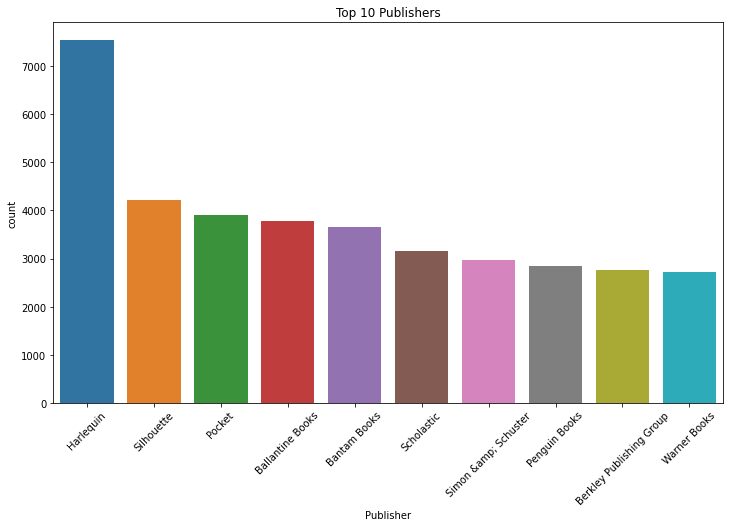

In [37]:
# Barplot to show top 10 publishers.

plt.figure(figsize=(12,7))
chart = sns.countplot(x='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Top 10 Publishers')

* **Harleyquin had published maximum number of books followed by Silhouette.**

### **Year-of-Publication column**

In [38]:
# Printing unique values of location column

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

**Points to note:**
> * **Year-of-Publication column contains some name of publishers.**
> * **Also, some values are int and some values are string.**



**So, let's convert all of them into string datatype**

In [39]:
# Converting all values into string

books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')

### **Now let's explore and clean Year-of-Publication column**

In [40]:
# Investigating the rows having 'DK Publishing Inc' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


* **It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file.**

In [41]:
# Book Author is incorrectly loaded with Book Title, so let's correct them

#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [42]:
# Let's check the corrections

books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [43]:
# Investigating the rows having 'Gallimard' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [44]:
# Making required corrections as above, keeping other fields intact

books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [45]:
# Let's check the corrections

books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard


**We have successfully managed to correct mistakes in Year-of-Publication column.**

**Now let's convert all values of Year-of-Publication into integers.**

In [46]:
# Converting each values from string to integers

books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


**Points to note:**

* **The value 0 for Year-of-Publication doesn't make any sense.**
* **Years after 2006 are invalid as this dataset was published in 2004.**
* **So, we are setting invalid years as NaN.**
* **Also, considering extreme value as 2006 just to keeping some margin in case dataset was updated thereafter.**

In [47]:
# Setting invalid years as NaN

books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [48]:
# Replacing NaNs with mean value of Year-Of-Publication

books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].mean()), inplace=True)

In [49]:
# Let's check the no. of null values in Books data

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

* **Null values in Book-Author and Publisher columns. So, let's impute them.**



### **Publisher column**

In [50]:
# Exploring 'publisher' column

books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [51]:
# Filling NaN of Publisher with others

books.Publisher.fillna('other',inplace=True)

### **Book-Author column**

In [52]:
# Exploring 'Book-Author' column

books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [53]:
# Filling Nan of Book-Author with others

books['Book-Author'].fillna('other',inplace=True)

In [54]:
# Let's check for null values again

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

* **Great! We imputed all null values and our Books dataset is clean now.**

# **EDA on Ratings dataset**

### **Ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset.**

In [55]:
# Extracting ratings of only available books in books dataset

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

* **It is clear that many rows having book ISBN not part of books dataset, got dropped off.**

### **Ratings dataset should have ratings from users which exist in users dataset.**

In [56]:
# Checking if ratings from users are eual to no. of users or not

print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


* **No new user was there in ratings dataset.**

### **Let's see the distribution of ratings**

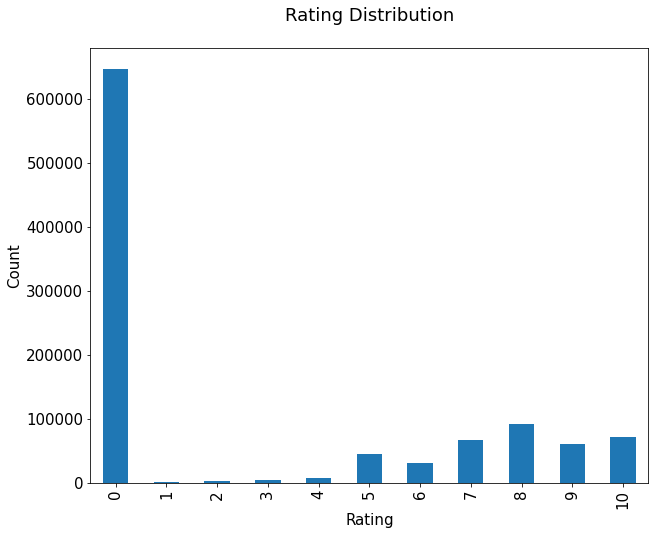

In [57]:
# Distribution plot of ratings

plt.figure(figsize=(10,8))
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* **The ratings are very unevenly distributed, and the vast majority of ratings are 0.**
* **As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.**
* **Hence segragating implicit and explict ratings datasets.**

In [58]:
# Segragating implicit and explict ratings datasets

ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

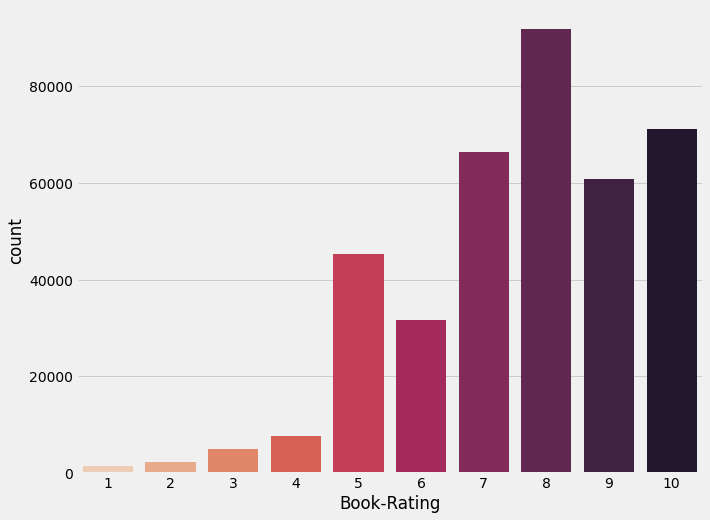

In [59]:
# Distribution of explicit ratings

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

* **Generally users rate higher ratings and rating 8 has been rated highest number of times.**

### **Let's find the top 5 books which are rated by most number of users.**

In [60]:
# Top 5 most rated books

rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


* **The book with ISBN '0316666343' received the most rating counts.**

### **Let’s find out what book it is, and what books are in the top 5.**

In [61]:
# Names of top rated books

most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


**Points to note:**
* **The title of most rated book is Alice Sebold’s “The Lovely Bones:A Novel”.** 
* **All 5 most rated books are Novels.** 
* **So it is conclusive that novels are popular and likely receive more ratings.**

In [62]:
# Creating column Rating average 

ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')


In [63]:
# Creating column Rating sum

ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


# **Merge all Datasets**

In [64]:
# Merging all three datsets together

Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [65]:
# Let's take a look at final_dataset

Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,34.746638,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,34.746638,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.000000,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,34.746638,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,34.746638,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [66]:
# Shape of Final_Dataset

Final_Dataset.shape

(383842, 11)

In [67]:
# Let's check percentage of null values in each column

print(100*(Final_Dataset.isnull().sum()/len(Final_Dataset.index)).sort_values(ascending=False))

Publisher                  0.0
Year-Of-Publication        0.0
Book-Author                0.0
Book-Title                 0.0
Total_No_Of_Users_Rated    0.0
Avg_Rating                 0.0
Book-Rating                0.0
ISBN                       0.0
Country                    0.0
Age                        0.0
User-ID                    0.0
dtype: float64


* **Great! There are 0% null values in Final_Dataset.**

# **Popularity Based Filtering**

**Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.**

In [68]:
# Finding values of C and m.

C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504765 , m=64.0


(38570, 11)

In [69]:
# Weighted_rating function to find popular books.

def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [70]:
# Keeping only one entry of each book

Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('seagreen',as_cmap=True)

In [71]:
# Sorting books based on score calculated above

Top_Books = Top_Books.sort_values('Score', ascending=False)

In [72]:
# Printing the top 10 popular books

Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(10).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


* **The Popularity based recommender provide a general chart of recommended books to all the users.**
* **They are not sensitive to the interests and tastes of a particular user.**

# **Collaborative Filtering Recommender**

## **Model Based Approach**

**The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.**

In [73]:
# Importing Libraries

import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [74]:
# Renaming columns of ratings_explicit dataframe

ratings_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [75]:
# Extracting no. of users with atleast 3 ratings

user_ratings_threshold = 3

filter_users = ratings_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = ratings_explicit[ratings_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


In [76]:
# Extracting top 10% most frequently rated books

book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['isbn'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['isbn'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['isbn'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 160787


### **SVD and NMF algorithms**

**Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction.**

**Surprise package provides implementation of these algorithms.**

In [77]:
# Installing surprise

!pip install surprise

     |████████████████████████████████| 11.8 MB 9.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619421 sha256=e2a13a92660354701b146e8fe6e8a39527dc994fdfcb929936555e92b54c4bfd
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [78]:
# Importing modules

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [79]:
# First take copy of dataset

df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [80]:
# Fitting SVD model

model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse    1.603565
test_mae     1.240957
fit_time     5.582814
test_time    0.570978
dtype: float64

In [81]:
# Fitting NMF model

model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    2.616905
test_mae     2.234363
fit_time     9.284580
test_time    0.541564
dtype: float64

* **SVD gives better results in terms of accuracy and training/test time.**

### **Optimization of SVD**

**The hyperparameters of SVD:**
<br>
* **n_factors** - the number of factors<br>
* **n_epochs** - the number of iteration of the SGD procedure<br>
* **lr_all** - the learning rate for all parameters<br>
* **reg_all** - the regularization term for all parameters<br>

**To find optimal set of hyperparameters we use GridSearchCV**

In [82]:
# Initializing parameters dictionary for GridSearchCV

param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, joblib_verbose=2, n_jobs=-1)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min


1.5966272879233998
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.9min finished


### **Analysis of SVD model results**

In [83]:
# Splitting train and test set and also fitting the model with hyperparameters obtained above

trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [84]:
# Creating dataframe of results

df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
15452,235925,0060977493,9.0,7.471587,False,7.0,1.528413
1452,242639,0596001088,10.0,8.014241,False,8.0,1.985759
30171,201969,0345447840,8.0,6.975950,False,7.0,1.024050
26137,215375,0452282152,7.0,7.852978,False,8.0,0.852978
14950,250454,044023722X,8.0,7.355667,False,7.0,0.644333


### **Let's see the distribution of actual and predicted book ratings**

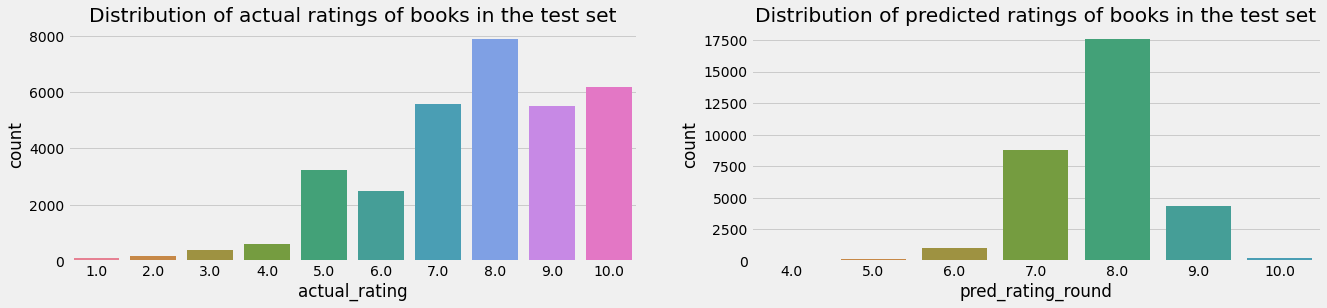

In [85]:
# Distribution of actual and predicted book ratings

palette = sns.color_palette("husl", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

**According to the distribution of actual ratings of books in the test set:**
* **The more number of users give positive scores - between 7 and 10.**
* **The mode equals 8 but count of ratings 7, 9, 10 is also noticeable.**
* **The distribution of predicted ratings in the test set is visibly different.**
* **Here again, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.**

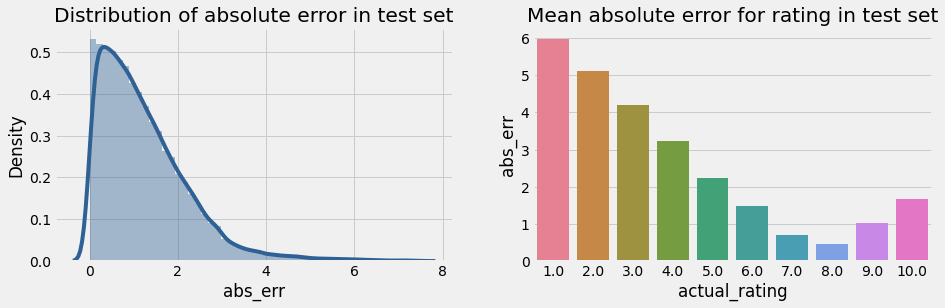

In [86]:
# Distribution of absolute error of predicted ratings

df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

* **The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1.**
* **There is a long tail that indicates that there are several observations for which the absolute error was close to 10.**

### **Analysis of predicted ratings of a particular user**

In [87]:
# Let's first make a copy of books dataset and merge on predicted dataframe

df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

**We select the user with ID 193458 to analyse ratings**

### **Train set: Top rated books**

In [88]:
# Printing top 10 rated books by user 193458

selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['book_rating']>=9)].sample(10)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113530,193458,0064471063,9,8.518519,27,The Horse and His Boy,NaN
113531,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
113570,193458,0671880314,9,8.305556,36,Schindler's List,NaN
113535,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",NaN
113540,193458,0142001740,9,8.452769,307,The Secret Life of Bees,NaN
113547,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,NaN
113567,193458,0553258001,9,8.236842,38,The Cider House Rules,NaN
113577,193458,0887309100,9,7.600000,5,The Dilbert Future: Thriving on Business Stupi...,NaN
113545,193458,0330352695,9,7.615385,13,Four Letters of Love,NaN
113536,193458,0140298479,9,7.539823,113,Bridget Jones: The Edge of Reason,NaN


### **Test set: Predicted top rated books**

In [89]:
# Printing prediction of top 5 rated books

df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113528,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.758941
113555,193458,0399145923,6,7.833333,24,Carolina Moon,8.200589
113582,193458,1853260622,5,8.272727,11,War and Peace (Wordsworth Classics),8.123705
113552,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),8.104998
113581,193458,1853260169,10,8.153846,13,Sense and Sensibility (Wordsworth Classics),8.089691


### **Test set: Actual top rated books**

In [90]:
# Printing actual top 5 rated books by user 193458

df_user[df_user['pred_rating'].notna()].sort_values('book_rating', ascending=False).head(5)

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
113581,193458,1853260169,10,8.153846,13,Sense and Sensibility (Wordsworth Classics),8.089691
113528,193458,0064471047,9,8.714286,42,"The Lion, the Witch, and the Wardrobe (The Chr...",8.758941
113538,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),7.783481
113546,193458,0345342569,9,7.947368,19,Shoeless Joe,8.062578
113552,193458,0345431057,9,9.125000,8,Slaves in the Family (Ballantine Reader's Circle),8.104998


**After analyzing book ratings by the user - 193458:**
* **He/she likes English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List).**
* **Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.**

## **Memory Based Approach**

### **Item-Item Based Filtering**

In [91]:
# Importing libraries

from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [92]:
# Top ratings dataframe

df_ratings_top.head()

,user_id,isbn,book_rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


In [93]:
# Renaming columns of top ratings dataframe

df_ratings_top.rename(columns={'user_id':'userID' ,'isbn':'ISBN','book_rating':'bookRating'},inplace=True)

In [94]:
df_ratings_top.head()

,userID,ISBN,bookRating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
59,276772,0553572369,7,6.625000,8
61,276772,3499230933,10,7.166667,6


### **Implementing kNN for finding similar users**

In [95]:
# Generating ratings matrix from explicit ratings table

ratings_matrix = df_ratings_top.pivot(index='userID', columns='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(18558, 13740)


ISBN,0002005018,0002251760,0002259834,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,0006492347,000649840X,0006511767,0006546684,0006547834,0006550576,0006550789,0006550924,0006551971,0006716652,0007100922,0007110928,0007119860,0007141076,0007154615,000716226X,0007170866,0020125305,0020125607,0020198817,0020198906,0020199600,002026478X,0020264801,0020306652,0020360754,002040400X,0020418809,0020427115,0020427859,0020442009,...,8472237966,8477204055,8478447229,8478884459,8478884955,8478885196,8478886451,8483100630,8483101610,8483140004,8484505294,8484602508,8495359537,8495501074,8495501090,8495501198,8495501252,8495501465,849550152X,8495618605,8804470895,8806142100,8806143042,880781000X,880781210X,8807813025,8817106100,8838910170,8845205118,9074336329,9129622425,9500723832,950491036X,9505156642,9505156944,958704049X,9681500954,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Most of the values are NaN (undefined) i.e. absence of ratings.**

In [96]:
# Considering only those users who gave explicit ratings

n_users = ratings_matrix.shape[0] 
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

18558 13740


In [97]:
# Filling NaN values with 0

ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [98]:
#checking first 5 rows

ratings_matrix.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0003300277,000617616X,0006480764,000648302X,0006485200,0006492347,000649840X,0006511767,0006546684,0006547834,0006550576,0006550789,0006550924,0006551971,0006716652,0007100922,0007110928,0007119860,0007141076,0007154615,000716226X,0007170866,0020125305,0020125607,0020198817,0020198906,0020199600,002026478X,0020264801,0020306652,0020360754,002040400X,0020418809,0020427115,0020427859,0020442009,...,8472237966,8477204055,8478447229,8478884459,8478884955,8478885196,8478886451,8483100630,8483101610,8483140004,8484505294,8484602508,8495359537,8495501074,8495501090,8495501198,8495501252,8495501465,849550152X,8495618605,8804470895,8806142100,8806143042,880781000X,880781210X,8807813025,8817106100,8838910170,8845205118,9074336329,9129622425,9500723832,950491036X,9505156642,9505156944,958704049X,9681500954,9722016563,9812327975,9871138148
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


* **Ratings_matrix is a sparse matrix. Let's check the % of sparsity.**

In [99]:
# Calculating sparsity of ratings_matrix

sparsity = 1.0-len(ratings_explicit)/float(ratings_explicit.shape[0]*n_books)
print ('The sparsity level of Book Crossing dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99272197962155 %


In [100]:
# Merging books and ratings dataset together

combine_book_rating = pd.merge(ratings, books, on = 'ISBN')
columns = ['Book-Author','Year-Of-Publication', 'Publisher']

In [101]:
# Renaming columns of combine_book_rating

combine_book_rating = combine_book_rating.drop(columns, axis = 1)
combine_book_rating.rename(columns={'User-ID':'userID','Book-Title':'bookTitle','Book-Rating':'bookRating'},inplace=True)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [102]:
# Dropping NaN values

combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

In [103]:
# Calculating counts of ratings

book_ratingcount = (combine_book_rating.
                    groupby(by = ['bookTitle',])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'TotalRatingCount'})
                    [['bookTitle','TotalRatingCount']])

In [104]:
book_ratingcount.head()

,bookTitle,TotalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


**Let's merge the rating data with total rating count data.**

In [105]:
# Merging rating data with total rating count data

rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'inner' )

In [106]:
rating_with_totalratingcount.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [107]:
# Descriptive stats of TotalRatingCount

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingcount['TotalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: TotalRatingCount, dtype: float64


* **The median book has been rated only once.**

**Let's look at the top of the distribution:**

In [108]:
# Let's look at the top of the distribution

print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.900    7.000
0.910    8.000
0.920    9.000
0.930   10.000
0.940   11.000
0.950   13.000
0.960   16.000
0.970   20.000
0.980   29.000
0.990   50.000
Name: TotalRatingCount, dtype: float64


* **About 1% of the books received 50 or more ratings.**
* **We have so many books in our data, so we will limit it to the top 1%.**

In [109]:
# Setting popularity threshold at 50

popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [110]:
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [111]:
# Dropping duplicate values

if not rating_popular_book[rating_popular_book.duplicated(['userID', 'bookTitle'])].empty:
    initial_rows = rating_popular_book.shape[0]

    print('Initial dataframe shape {0}'.format(rating_popular_book.shape))
    rating_popular_book = rating_popular_book.drop_duplicates(['userID', 'bookTitle'])
    current_rows = rating_popular_book.shape[0]
    print('New dataframe shape {0}'.format(rating_popular_book.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (288740, 5)
New dataframe shape (285518, 5)
Removed 3222 rows


In [112]:
# Creating rating matrix of US and Canada users

us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'bookTitle',columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

### **Now let's find the nearest neighbors**

In [113]:
# Fitting kNN model to find nearest neighbors

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

### **Let's test our model and make few recommendations**

In [114]:
# Making some recommendations considering 6 nearest neighbors

query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Hush:

1: The Return, with distance of 0.827019716756294:
2: Key of Knowledge (Key Trilogy (Paperback)), with distance of 0.8295905509895086:
3: No Second  Chance, with distance of 0.8559143171862039:
4: The Penwyth Curse, with distance of 0.8690821953734849:
5: Cloud Nine, with distance of 0.8769991806457155:


In [115]:
# Filling Nan values with 0

us_canada_user_rating_pivot2 = rating_popular_book.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)

In [116]:
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,4 Blondes,50 Simple Things You Can Do to Save the Earth,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Clockwork Orange (Norton Paperback Fiction),A Cold Heart (Alex Delaware Novels (Paperback)),A Cold Heart: An Alex Delaware Novel,A Confederacy of Dunces,A Confederacy of Dunces (Evergreen Book),A Cry In The Night,A Cup of Tea (Ballantine Reader's Circle),A Dangerous Fortune,A Darkness More Than Night,A Day Late and a Dollar Short,A Density of Souls,A Fine Balance,"A Game of Thrones (A Song of Ice and Fire, Book 1)",A Girl Named Zippy: Growing Up Small in Mooreland Indiana (Today Show Book Club #3),A Great Deliverance,A Heartbreaking Work Of Staggering Genius : A Memoir Based on a True Story,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Kiss of Shadows (Meredith Gentry Novels (Paperback)),A Knight in Shining Armor,A Lesson Before Dying (Vintage Contemporaries (Paperback)),...,Wild Justice,Wild Mountain Thyme,Wild Swans: Three Daughters of China,Windmills of the Gods,Windy City Blues (V.I. Warshawski Novels (Paperback)),Wings,Winter Moon,Winter Prey,Winter Solstice,"Winter's Heart (The Wheel of Time, Book 9)",Winter's Tale,Wish You Well,Without Remorse,Witness in Death (Eve Dallas Mysteries (Paperback)),"Wizard and Glass (The Dark Tower, Book 4)","Wizard's First Rule (Sword of Truth, Book 1)",Wobegon Boy,Woman on the Edge of Time,Women Who Run with the Wolves,Women in His Life,Women of the Silk : A Novel,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",World of Pies : A Novel,Wouldn't Take Nothing for My Journey Now,Writ of Execution,Writing Down the Bones,Wuthering Heights,Wuthering Heights (Penguin Classics),Wuthering Heights (Wordsworth Classics),Xenocide (Ender Wiggins Saga (Paperback)),YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [117]:
# Shape of us_canada_user_rating dataset

us_canada_user_rating_pivot2.shape

(47994, 2444)

In [118]:
# Applying transpose

X = us_canada_user_rating_pivot2.values.T
X.shape

(2444, 47994)

* **Dimension of dataset is too large.**
* **So, let's perform dimensionality reduction.**

In [119]:
# Using TrincatedSVD for Dimensionality Reduction

import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2444, 12)

In [120]:
# Making correlation coefficient matrix of books

corr = np.corrcoef(matrix)
corr.shape

(2444, 2444)

### **Let's find books similar to Harry Potter and the Sorcerer's Stone (Book 1)**

In [121]:
# Extracting book Harry Potter and the Sorcerer's Stone (Book 1)

us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [122]:
# Making correlation matrix of Harry Potter and the Sorcerer's Stone (Book 1)

corr_coffey_hands  = corr[coffey_hands]

In [123]:
# Finding books similar to Harry Potter and the Sorcerer's Stone (Book 1)

list(us_canada_book_title[(corr_coffey_hands<1.0) & (corr_coffey_hands>0.9)])

['Harry Potter and the Chamber of Secrets (Book 2)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Harry Potter and the Prisoner of Azkaban (Book 3)']

* **So, these are the books which are similar to Harry Potter and the Sorcerer's Stone.**

### **User-Item Based Filtering**

In [124]:
# Renaming columns of ratings_explicit dataframe

ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000,1
3,276729,052165615X,3,3.000,1
4,276729,0521795028,6,6.000,1
8,276744,038550120X,7,7.580,81
16,276747,0060517794,9,8.000,30


In [125]:
# Printing number of users and number of users with atleast 5 interactions

users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Total Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('Number of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

Total Number of users: 68091
Number of users with at least 5 interactions: 449


In [126]:
# Printing no. of interactions and no. of interactions from users with at least 5 interactions

print('Total number of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

Total number of interactions: 383842
Number of interactions from users with at least 5 interactions: 103271


In [127]:
# Let's see those selected users

interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000,1
1,2033,0060248025,10,8.767,30
2,2033,0060256664,10,8.333,6
3,2033,0060256737,10,9.045,22
4,2033,0060950536,10,9.400,5
5,2033,0061020419,7,7.000,1
6,2033,0061020427,6,6.000,1
7,2033,0061056278,10,9.000,2
8,2033,0061056286,8,7.667,3
9,2033,0061056294,9,7.000,2


**Now let's perform data scaling.**

In [128]:
# Appling log transform on Book-Rating

def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 103271


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.170
1,0001046438,23902,3.322
2,000104687X,23902,2.807
3,0001047213,23902,3.322
4,0001047973,23902,3.322


### **Train test split**

In [129]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [130]:
# Applying train_test_split

interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=12)

print('Number of interactions on Train set: %d' % len(interactions_train_df))
print('Number of interactions on Test set: %d' % len(interactions_test_df))

Number of interactions on Train set: 82616
Number of interactions on Test set: 20655


In [131]:
# Creating a sparse pivot table with users in rows and items in columns

users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,000104799X,0001048082,0001053736,0001053744,0001055607,0001845039,0001935968,0001944711,0001952803,0001953877,0002005018,0002005557,0002006588,0002115328,0002116286,0002118580,0002154900,0002158973,0002163713,0002176181,0002176432,0002179695,0002181924,0002184974,0002190915,0002197154,0002223929,0002228394,000223257X,0002233509,0002239183,0002244098,000225056X,0002250810,0002251485,0002251760,...,9813056096,9813056363,9813056495,9838120014,9838523283,9871106173,9871138148,9879397274,987960170X,9974643058,999058284X,9992003766,9992059958,9993584185,9994256963,9994348337,9997406567,9997406990,999740923X,9997409728,9997411757,9997411870,999750805X,9997508769,9997512952,9997519086,9997555635,B00001U0CP,B00005TZWI,B00006CRTE,B00006I4OX,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B00013AX9E,B0001I1KOG
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2110,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2276,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4017,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4385,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [132]:
# Creating array of values of users items pivot matrix df

users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
# Extracting users ids

users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

### **Let's make factors of user-item matrix**

In [134]:
# The number of factors to factor the user-item matrix.

NUMBER_OF_FACTORS_MF = 15

# Performs matrix factorization of the original user item matrix

U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [135]:
# Shape of user-item matrix

users_items_pivot_matrix.shape

(449, 55871)

**Let's check the shapes of all three factors.**

In [136]:
U.shape

(449, 15)

In [137]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [138]:
Vt.shape

(15, 55871)

**After the factorization, let's try to reconstruct the original matrix by multiplying its factors.**

In [139]:
# Multiplying all factors

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 2.20023214e-02,  2.57725085e-03,  2.17802964e-03, ...,
         4.87568540e-03,  3.74540686e-04,  3.50305352e-04],
       [-6.26310846e-04, -8.10335760e-04, -6.84813162e-04, ...,
         1.39488603e-03,  8.42185861e-05,  6.52115886e-05],
       [ 3.88898390e-03, -2.14130350e-03, -1.80961139e-03, ...,
         3.75527311e-03,  2.48705392e-04,  1.98275421e-04],
       ...,
       [ 8.60649094e-03,  2.39017228e-03,  2.01992991e-03, ...,
         4.83774702e-03,  3.22942815e-04,  2.44342541e-04],
       [ 2.21385219e-02, -3.23817431e-03, -2.73657476e-03, ...,
         6.15094081e-03,  3.77342333e-04,  3.03756214e-04],
       [ 4.18416680e-03, -1.23619910e-03, -1.04470944e-03, ...,
         2.19297970e-03,  1.32878748e-04,  9.14059801e-05]])

In [140]:
# Shape of resulting matrix

all_user_predicted_ratings.shape

(449, 55871)

* **The resulting matrix is not sparse any more.**
* **It generated predictions for items the user have not yet interaction, which we can use for recommendations.**

### **Let's convert the reconstructed matrix into a dataframe.**

In [141]:
# Converting the reconstructed matrix back to a Pandas dataframe

cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,8890,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,16966,17950,19085,21014,23768,23872,23902,25409,25601,25981,26535,...,250405,250709,251394,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000913154,0.022,-0.001,0.004,-0.000,-0.002,-0.004,-0.003,0.015,0.027,0.013,-0.001,0.012,-0.006,0.006,-0.005,-0.000,0.016,-0.001,0.003,0.008,-0.001,-0.006,-0.016,0.021,-0.004,0.009,0.005,0.031,0.004,0.015,-0.004,0.001,-0.012,-0.000,0.010,-0.006,0.000,0.004,-0.006,0.002,...,0.017,0.003,0.003,-0.002,0.025,-0.001,0.015,-0.001,-0.012,0.016,0.002,0.103,0.009,-0.003,-0.002,-0.001,-0.009,0.004,0.001,-0.005,0.050,-0.003,-0.006,0.018,-0.005,-0.001,0.009,0.001,0.004,0.008,0.001,0.002,-0.007,0.007,-0.013,-0.007,0.009,0.009,0.022,0.004
0001046438,0.003,-0.001,-0.002,0.024,-0.001,0.008,0.016,0.007,-0.004,0.009,-0.000,0.006,-0.001,0.012,0.007,0.000,-0.003,-0.002,-0.001,-0.003,0.002,0.011,-0.003,0.008,0.004,0.004,0.011,-0.001,-0.005,-0.001,0.001,-0.002,0.010,-0.005,0.003,3.311,0.001,-0.001,-0.007,-0.001,...,-0.000,-0.000,0.002,0.004,0.019,-0.005,0.002,0.005,0.007,-0.002,0.003,-0.014,-0.001,-0.000,0.010,0.003,-0.000,-0.001,-0.000,-0.003,-0.001,0.003,-0.001,-0.003,-0.007,0.004,0.012,-0.000,-0.001,0.006,-0.003,0.015,-0.002,0.024,-0.007,-0.009,-0.000,0.002,-0.003,-0.001
000104687X,0.002,-0.001,-0.002,0.021,-0.001,0.007,0.013,0.006,-0.003,0.008,-0.000,0.005,-0.001,0.011,0.006,0.000,-0.003,-0.002,-0.001,-0.003,0.002,0.009,-0.002,0.007,0.004,0.003,0.009,-0.001,-0.004,-0.001,0.001,-0.002,0.009,-0.004,0.003,2.798,0.001,-0.001,-0.006,-0.001,...,-0.000,-0.000,0.002,0.003,0.016,-0.004,0.002,0.004,0.006,-0.001,0.003,-0.012,-0.001,-0.000,0.009,0.002,-0.000,-0.001,-0.000,-0.003,-0.000,0.002,-0.001,-0.002,-0.006,0.004,0.010,-0.000,-0.000,0.005,-0.003,0.013,-0.001,0.021,-0.006,-0.008,-0.000,0.002,-0.003,-0.001
0001047213,0.003,-0.001,-0.002,0.024,-0.001,0.008,0.016,0.007,-0.004,0.009,-0.000,0.006,-0.001,0.012,0.007,0.000,-0.003,-0.002,-0.001,-0.003,0.002,0.011,-0.003,0.008,0.004,0.004,0.011,-0.001,-0.005,-0.001,0.001,-0.002,0.010,-0.005,0.003,3.311,0.001,-0.001,-0.007,-0.001,...,-0.000,-0.000,0.002,0.004,0.019,-0.005,0.002,0.005,0.007,-0.002,0.003,-0.014,-0.001,-0.000,0.010,0.003,-0.000,-0.001,-0.000,-0.003,-0.001,0.003,-0.001,-0.003,-0.007,0.004,0.012,-0.000,-0.001,0.006,-0.003,0.015,-0.002,0.024,-0.007,-0.009,-0.000,0.002,-0.003,-0.001
000104799X,0.001,0.000,0.001,0.002,0.000,0.001,0.001,0.002,0.002,0.003,0.000,0.005,0.001,0.001,0.001,-0.000,0.001,0.001,0.001,0.001,0.001,0.001,0.003,0.001,0.001,0.000,0.001,0.002,0.010,0.000,0.001,0.001,0.004,0.002,0.003,-0.001,0.002,0.000,0.002,0.000,...,0.000,0.000,0.001,0.002,0.001,0.001,0.001,0.001,0.002,0.001,0.002,0.001,0.000,0.001,0.004,0.000,0.003,0.000,0.001,0.001,0.001,0.001,0.002,0.001,0.002,0.001,0.001,0.001,0.002,0.001,0.001,0.002,0.002,0.001,0.001,0.002,0.002,0.001,0.001,0.000


### **Now it's time to make some recommendations.**

In [142]:
# Creating class for Collaborative Filtering Recommender

class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [143]:
# Indexing by personId to speed up the searches during evaluation

interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [144]:
# Defining function to get interacted items by particular user

def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [145]:
# Creating ModelRecommender class to get recommendation for particular user

class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

### **Let's recommend some books to User-ID 229329**

In [146]:
# Recommending books to user-ID 229329

model_recommender.recommend_book(cf_recommender_model,229329)

Recommendation for User-ID =  229329
         ISBN                                         Book-Title  recStrength
0  0312195516                The Red Tent (Bestselling Backlist)        0.090
1  0345370775                                      Jurassic Park        0.085
2  0312966970             Four To Score (A Stephanie Plum Novel)        0.076
3  0446310786                              To Kill a Mockingbird        0.073
4  0440214041                                  The Pelican Brief        0.072
5  059035342X  Harry Potter and the Sorcerer's Stone (Harry P...        0.071
6  0312924585                               Silence of the Lambs        0.070
7  0345361792                            A Prayer for Owen Meany        0.069
8  044021145X                                           The Firm        0.069
9  043935806X  Harry Potter and the Order of the Phoenix (Boo...        0.067


* **So, books like; The Red Tent, Jurassic Park, Four To Score, etc. recommended to user 229329.**

# **Evaluation**

### **Top-N accuracy metrics**

In [147]:
# Top-N accuracy metrics
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [148]:
# Printing recall@5 and recall@10 values

print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.23945775841200678, 'recall@10': 0.3103364802711208}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
0,242,305,1389,0.174,0.220,11676
2,203,269,1138,0.178,0.236,98391
12,24,35,380,0.063,0.092,189835
150,81,96,369,0.220,0.260,153662
93,29,36,236,0.123,0.153,23902
139,24,49,204,0.118,0.240,235105
65,16,19,203,0.079,0.094,76499
89,30,36,193,0.155,0.187,171118
95,58,69,192,0.302,0.359,16795
27,18,30,188,0.096,0.160,248718


# **Conclusion**

### **1.** Majority of the readers were of the age bracket 20-30 years.
------------------------------------------
### **2.** Most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.
------------------------------------------
### **3.** Top-10 most rated booke were essentially Novels. For example; The Lovely Bone and Wild Animus were very well perceived.
------------------------------------------
### **4.** In Model Based Collaborative Filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE).
------------------------------------------
### **5.** Out of Model Based and Memory Based, the performance decrease in case of Memory Based due to presence of sparse data.
------------------------------------------
### **6.** Given more information regarding the books dataset, namely features like Genre, Description etc, we could implement a content-filtering based recommendation system and compare the results with the existing collaborative-filtering based system.